In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import statsmodels.formula.api as sm
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('delivery_time.csv')
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
df1 = df.rename({'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'}, axis = 1)
df1

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [6]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [7]:
df[df.duplicated()].shape

(0, 2)

In [8]:
df[df.duplicated()]

,Delivery Time,Sorting Time


Plotting the data to check for outliers

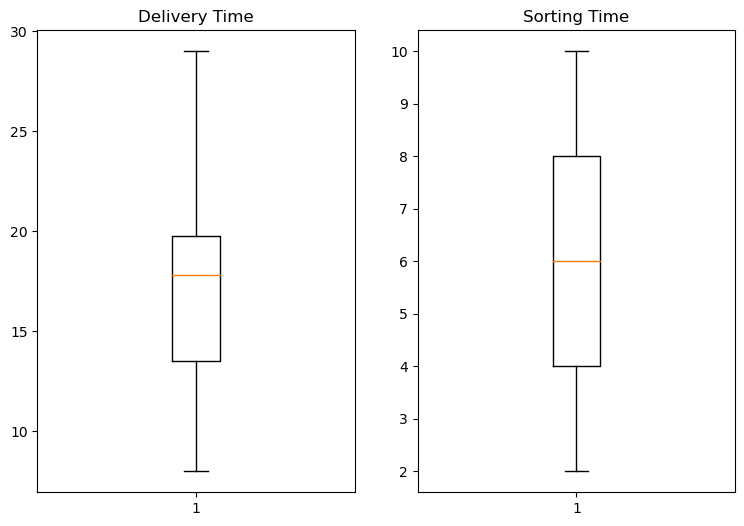

In [9]:
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(df['Delivery Time'])
plt.title('Delivery Time')
plt.subplot(122)
plt.boxplot(df['Sorting Time'])
plt.title('Sorting Time')
plt.show()

Checking the Correlation between variables

In [10]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


Visualization of Correlation beteen x and y
regplot = regression plot

<Axes: xlabel='Sorting Time', ylabel='Delivery Time'>

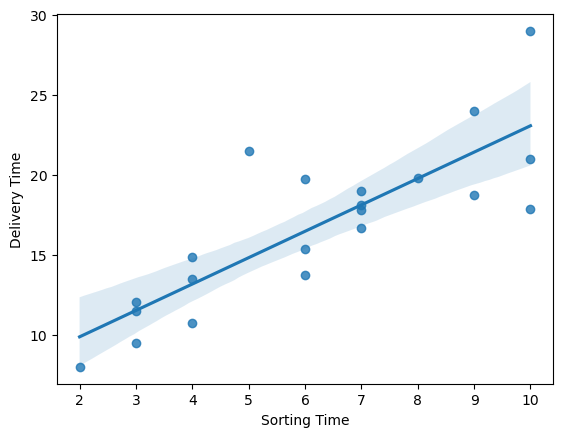

In [11]:
sns.regplot(x=df['Sorting Time'],y=df['Delivery Time'])  

Feature Engineering

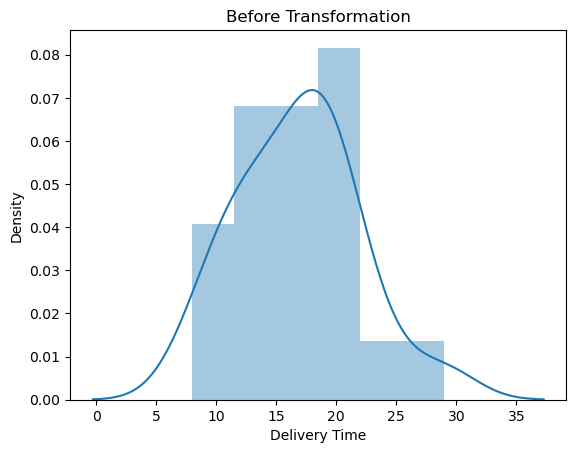

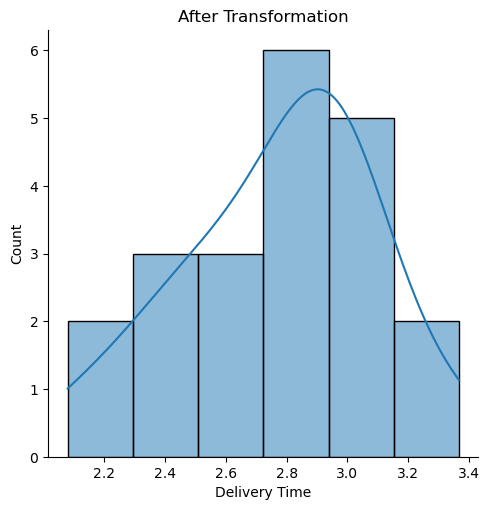

In [12]:
sns.distplot(df['Delivery Time'], bins = 6, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(df['Delivery Time']), bins = 6, kde = True)
plt.title('After Transformation')
plt.show()


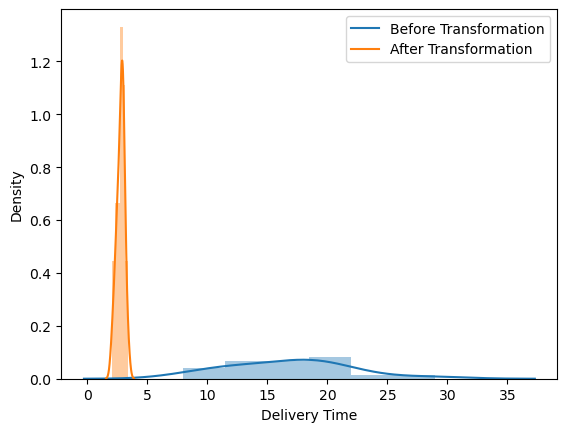

In [13]:
labels = ['Before Transformation','After Transformation']
sns.distplot(df['Delivery Time'], bins = 6, kde = True)
sns.distplot(np.log(df['Delivery Time']), bins = 6, kde = True)
plt.legend(labels)
plt.show()

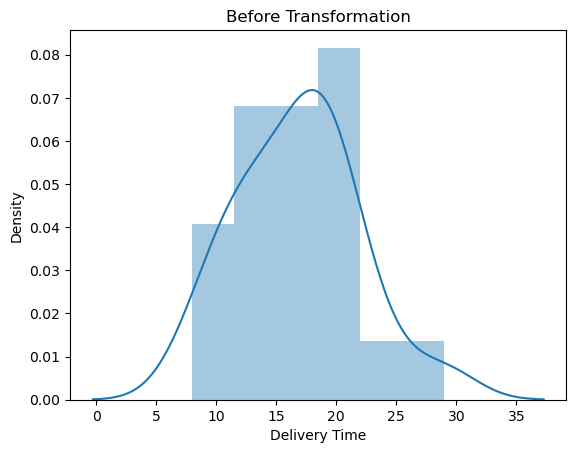

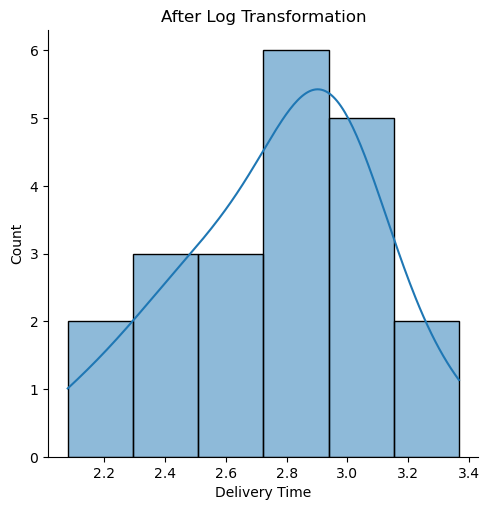

In [14]:
sns.distplot(df['Delivery Time'], bins = 6, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(df['Delivery Time']), bins = 6, kde = True)
plt.title('After Log Transformation')
plt.show()

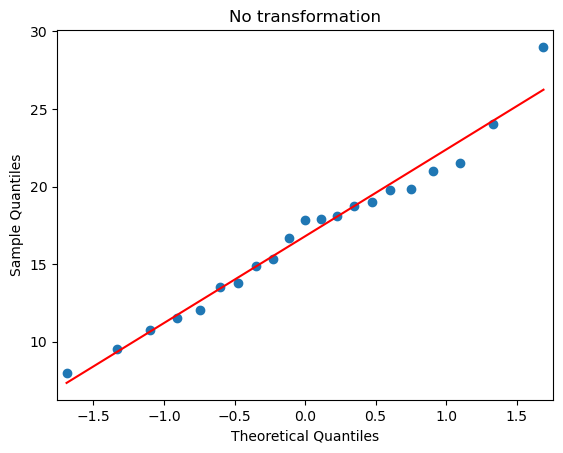

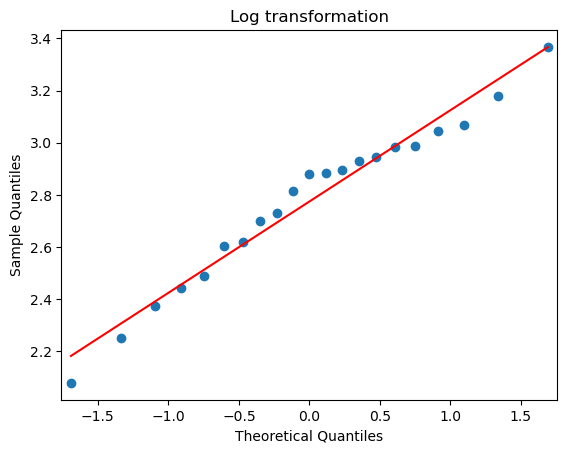

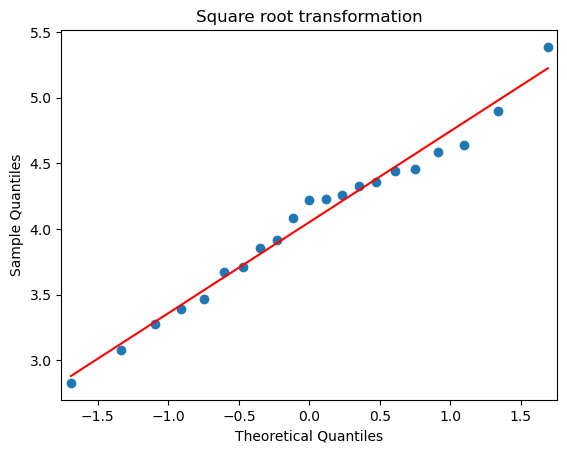

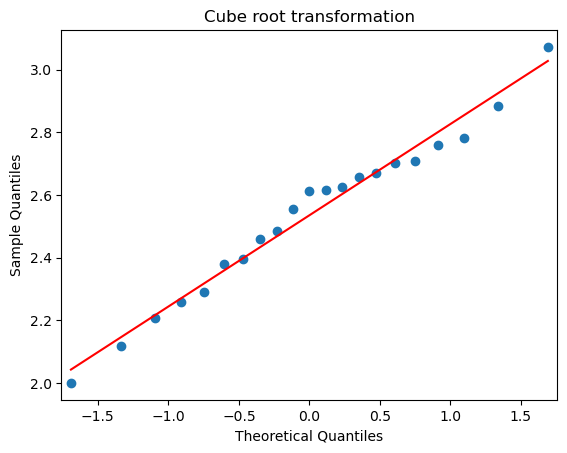

In [15]:
smf.qqplot(df['Delivery Time'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(df['Delivery Time']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(df['Delivery Time']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(df['Delivery Time']), line = 'r')
plt.title('Cube root transformation')
plt.show()

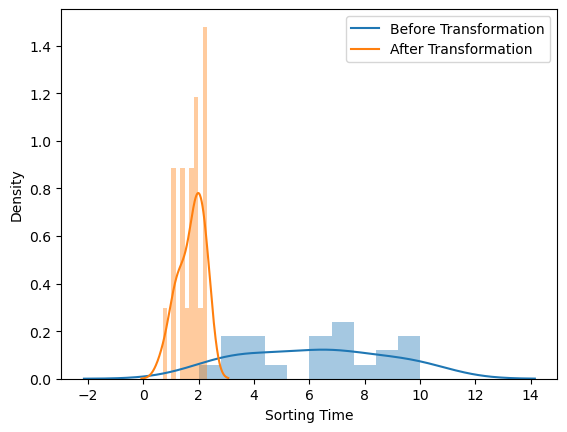

In [16]:
labels = ['Before Transformation','After Transformation']
sns.distplot(df['Sorting Time'], bins = 10, kde = True)
sns.distplot(np.log(df['Sorting Time']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

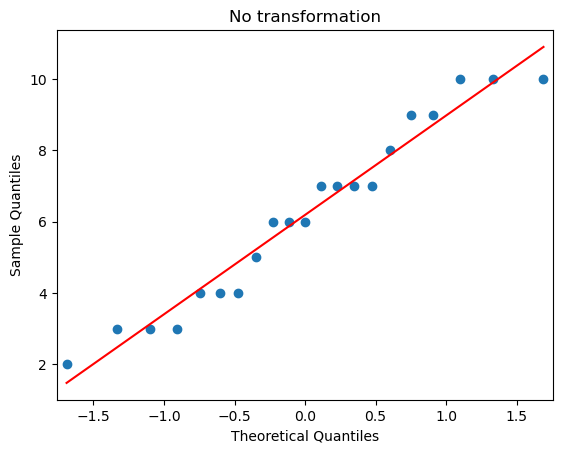

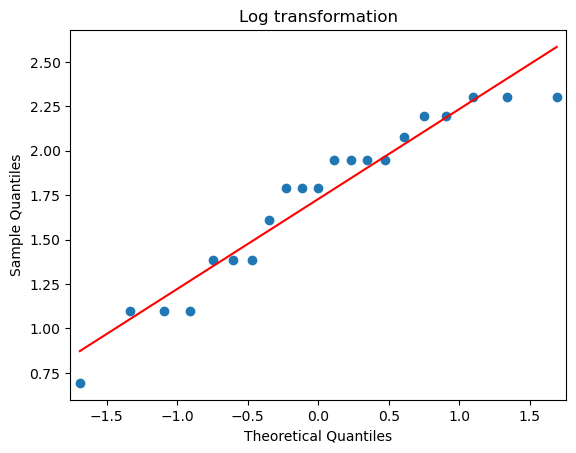

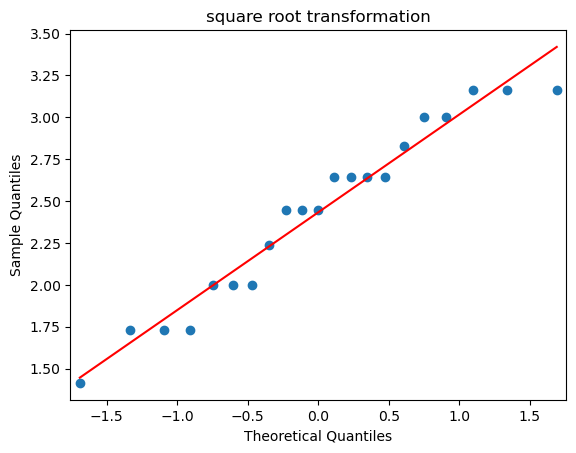

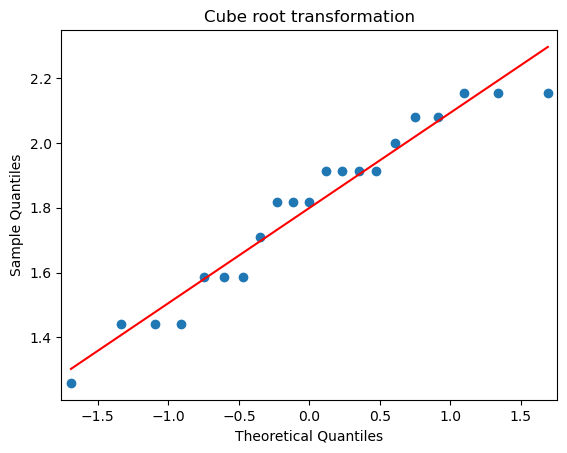

In [17]:
smf.qqplot(df['Sorting Time'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(df['Sorting Time']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(df['Sorting Time']), line = 'r')
plt.title('square root transformation')
smf.qqplot(np.cbrt(df['Sorting Time']), line = 'r')
plt.title('Cube root transformation')
plt.show()

Fitting a Linear Regression Model

In [18]:
model = sm.ols('Delivery_Time~Sorting_Time', data = df1).fit()

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           3.98e-06
Time:                        11:19:54   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Square Root transformation on data

In [20]:
square_root_model = sm.ols('np.sqrt(Delivery_Time)~np.sqrt(Sorting_Time)', data = df1).fit()
square_root_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.sqrt(Delivery_Time)   R-squared:                       0.729
Model:                                OLS   Adj. R-squared:                  0.715
Method:                     Least Squares   F-statistic:                     51.16
Date:                    Fri, 06 Oct 2023   Prob (F-statistic):           8.48e-07
Time:                            11:20:14   Log-Likelihood:                -5.7320
No. Observations:                      21   AIC:                             15.46
Df Residuals:                          19   BIC:                             17.55
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(Sorting_Time)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Cube Root transformation on Data

In [21]:
cube_root_model = sm.ols('np.cbrt(Delivery_Time)~np.cbrt(Sorting_Time)', data = df1).fit()
cube_root_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.cbrt(Delivery_Time)   R-squared:                       0.744
Model:                                OLS   Adj. R-squared:                  0.731
Method:                     Least Squares   F-statistic:                     55.25
Date:                    Fri, 06 Oct 2023   Prob (F-statistic):           4.90e-07
Time:                            11:20:34   Log-Likelihood:                 13.035
No. Observations:                      21   AIC:                            -22.07
Df Residuals:                          19   BIC:                            -19.98
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0136      0.207      4.900      0.000       0.581       1.447
np.cbrt(Sorting_Time)     0.8456      0.114      7.433      0.000       0.607       1.084
==============================================================================
Omnibus:                        2.570   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.532
Skew:                           0.661   Prob(JB):                        0.465
Kurtosis:                       3.075   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Log transformation on Data

In [22]:
log_model = sm.ols('np.log(Delivery_Time)~np.log(Sorting_Time)', data = df1).fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Fri, 06 Oct 2023   Prob (F-statistic):           1.60e-07
Time:                           11:20:52   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(Sorting_Time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Model Testing
As Y = Beta0 + Beta1*(X)
Finding Coefficient Parameters (Beta0 and Beta1 values)

In [23]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [24]:
print(model.tvalues,'\n',model.pvalues)

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


(Intercept) Beta0: tvalue=3.82 , pvalue=0.001147
(daily) Beta1: tvalue=6.38, pvalue=0.000004
As (pvalue=0)<(α=0.05); Reject Null hyp. Thus, X(Sorting Time) variable has good slope and variance w.r.t Y(Delivery Time) variable.
R-squared measures the strength of the relationship between your model and the dependent variable on a 0 – 100% scale.
Measure goodness-of-fit by finding rsquared values (percentage of variance)

Test for Normality of Residuals (Q-Q Plot)

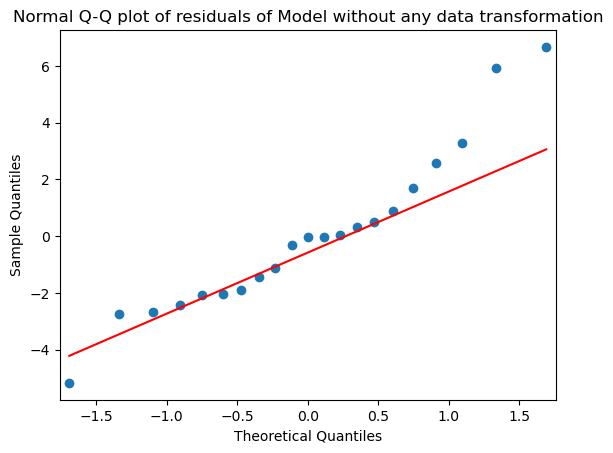

In [25]:
import statsmodels.api as sm
sm.qqplot(model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model without any data transformation')
plt.show()

Model Validation
Comparing different models with respect to their Root Mean Squared Errors
We will analyze Mean Squared Error (MSE) or Root Mean Squared Error (RMSE)
— AKA the average distance (squared to get rid of negative numbers) between the 
model’s predicted target value and the actual target value.

In [26]:
from sklearn.metrics import mean_squared_error

In [27]:
square_root_pred_y =np.square(square_root_model.predict(df1['Sorting_Time']))
cube_root_pred_y =pow(cube_root_model.predict(df1['Sorting_Time']),3)
log_model_pred_y =np.exp(log_model.predict(df1['Sorting_Time']))

In [28]:
square_root_rmse =np.sqrt(mean_squared_error(df1['Delivery_Time'], square_root_pred_y))
cube_root_rmse =np.sqrt(mean_squared_error(df1['Delivery_Time'], cube_root_pred_y))
log__rmse =np.sqrt(mean_squared_error(df1['Delivery_Time'], log_model_pred_y))
print('model=', np.sqrt(model.mse_resid),'\n' 'square_root_model=', square_root_rmse,'\n' 'cube_root_model=', cube_root_rmse,'\n' 'log_model=', log__rmse)


model= 2.9349037688901394 
square_root_model= 2.762294279320867 
cube_root_model= 2.755584309893575 
log_model= 2.7458288976145497


In [29]:
data = {'model': np.sqrt(model.mse_resid), 'square_root_model': square_root_rmse, 'cube_root_model': cube_root_rmse, 'log_model' : log__rmse}
min(data, key=data.get)

'log_model'

# As log_model has the minimum RMSE and highest Adjusted R-squared score. Hence, we are going to use log_model to predict our values

Predicting values from Model with Log Transformation on the Data

In [30]:
predicted = pd.DataFrame()
predicted['Sorting_Time'] = df1.Sorting_Time
predicted['Delivery_Time'] = df1.Delivery_Time
predicted['Predicted_Delivery_Time'] = pd.DataFrame(np.exp(log_model.predict(predicted.Sorting_Time)))
predicted

,Sorting_Time,Delivery_Time,Predicted_Delivery_Time
0,10,21.00,22.597360
1,4,13.50,13.070123
2,6,19.75,16.653216
3,9,24.00,21.218593
4,10,29.00,22.597360
5,6,15.35,16.653216
6,7,19.00,18.259981
7,3,9.50,11.005911
8,10,17.90,22.597360
9,9,18.75,21.218593


In [31]:
predicted1 = pd.DataFrame()
predicted1['Sorting_Time'] = df1.Sorting_Time
predicted1['Delivery_Time'] = df1.Delivery_Time
predicted1['Predicted_Delivery_Time'] = pd.DataFrame(model.predict(predicted1.Sorting_Time))
predicted1

,Sorting_Time,Delivery_Time,Predicted_Delivery_Time
0,10,21.00,23.072933
1,4,13.50,13.178814
2,6,19.75,16.476853
3,9,24.00,21.423913
4,10,29.00,23.072933
5,6,15.35,16.476853
6,7,19.00,18.125873
7,3,9.50,11.529794
8,10,17.90,23.072933
9,9,18.75,21.423913
